In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

<Axes: xlabel='Status', ylabel='count'>

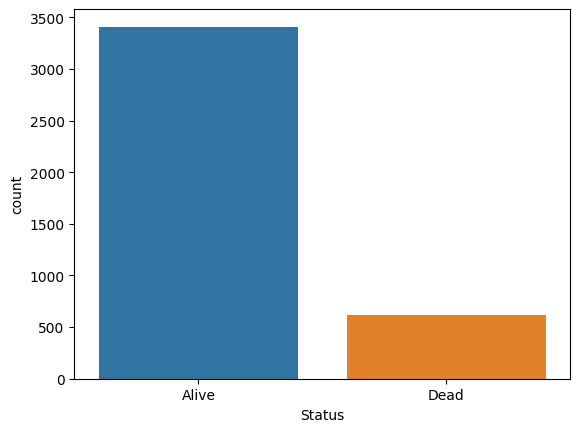

In [5]:
sns.countplot(data=df , x='Status')

In [6]:
df.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [7]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [8]:
ec = LabelEncoder()
dfobj=df.select_dtypes(include='object')
dfint=df.select_dtypes(exclude='object')

In [9]:
for i in range(0,dfobj.shape[1]):
   dfobj.iloc[:,i]=ec.fit_transform(dfobj.iloc[:,i])

In [10]:
dfobj=dfobj.astype("int")

In [11]:
data = pd.concat([dfobj,dfint] , axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4024 non-null   int64
 1   Marital Status          4024 non-null   int64
 2   T Stage                 4024 non-null   int64
 3   N Stage                 4024 non-null   int64
 4   6th Stage               4024 non-null   int64
 5   differentiate           4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Estrogen Status         4024 non-null   int64
 9   Progesterone Status     4024 non-null   int64
 10  Status                  4024 non-null   int64
 11  Age                     4024 non-null   int64
 12  Tumor Size              4024 non-null   int64
 13  Regional Node Examined  4024 non-null   int64
 14  Reginol Node Positive   4024 non-null   int64
 15  Survival Months      

In [12]:
x=data.drop(['Status'] , axis=1)
y=data.Status

rs = RandomOverSampler(random_state=20)
x_res,y_res = rs.fit_resample(x,y)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2 ,random_state=10)

In [14]:
model1=LogisticRegression()
model2=GradientBoostingRegressor()
model3=RandomForestClassifier()
model4=SVC()
model5=XGBClassifier()
model6=KNeighborsClassifier()

In [15]:
model1.fit(x_train,y_train)
pre = model1.predict(x_test)
print(classification_report(y_test,pre))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       667
           1       0.83      0.78      0.80       697

    accuracy                           0.81      1364
   macro avg       0.81      0.81      0.81      1364
weighted avg       0.81      0.81      0.81      1364



In [16]:
def pred(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    print(classification_report(y_test,pre))

In [17]:
pred(model1)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       667
           1       0.83      0.78      0.80       697

    accuracy                           0.81      1364
   macro avg       0.81      0.81      0.81      1364
weighted avg       0.81      0.81      0.81      1364



In [18]:
pred(model3)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       667
           1       0.97      0.99      0.98       697

    accuracy                           0.98      1364
   macro avg       0.98      0.98      0.98      1364
weighted avg       0.98      0.98      0.98      1364



In [19]:
pred(model4)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       667
           1       0.87      0.73      0.79       697

    accuracy                           0.80      1364
   macro avg       0.81      0.80      0.80      1364
weighted avg       0.81      0.80      0.80      1364



In [20]:
pred(model5)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       667
           1       0.94      0.97      0.96       697

    accuracy                           0.95      1364
   macro avg       0.96      0.95      0.95      1364
weighted avg       0.95      0.95      0.95      1364



In [21]:
pred(model6)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       667
           1       0.83      0.93      0.88       697

    accuracy                           0.87      1364
   macro avg       0.87      0.86      0.86      1364
weighted avg       0.87      0.87      0.87      1364

